In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import itertools

import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
results = pd.read_csv("metrics.csv")

dataf = results[results["algo"] == "datafly"]
mondr = results[results["algo"] == "mondrian"]
dataf_shuff = results[results["algo"] == "datafly_shuffled"]

In [31]:
results["no"].value_counts()

99     3
100    3
71     3
69     3
68     3
      ..
137    1
89     1
163    1
84     1
200    1
Name: no, Length: 195, dtype: int64

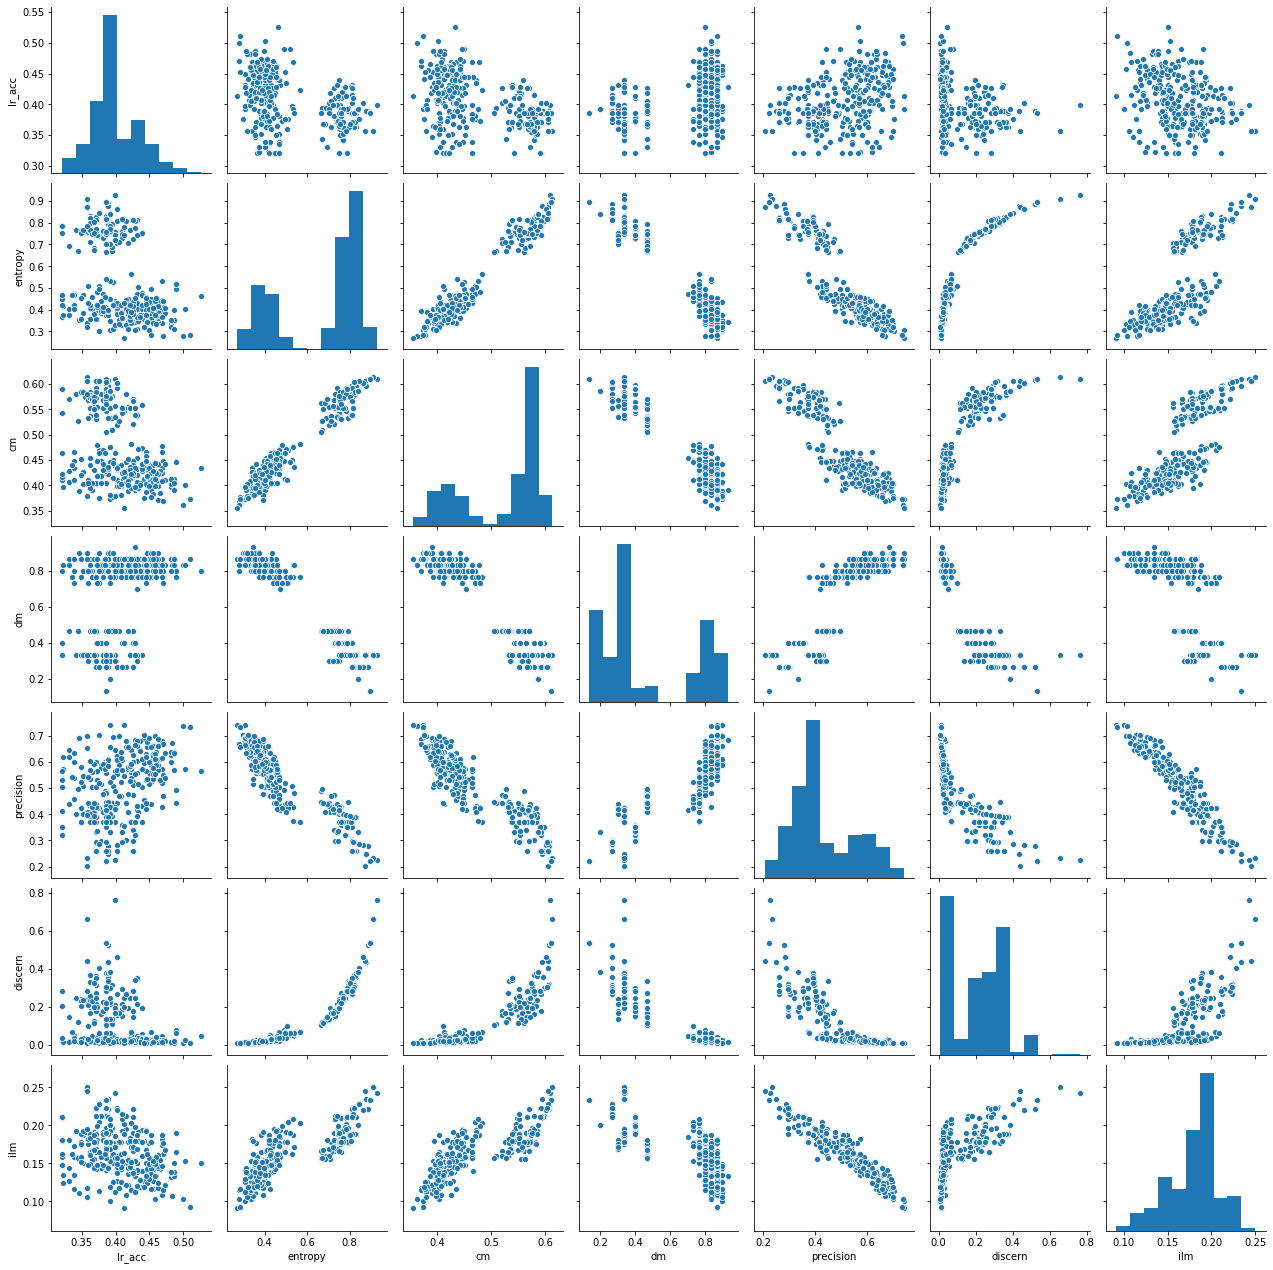

In [4]:
sb.pairplot(results[["lr_acc", "entropy", "cm", "dm", "precision", "discern", "ilm"]])

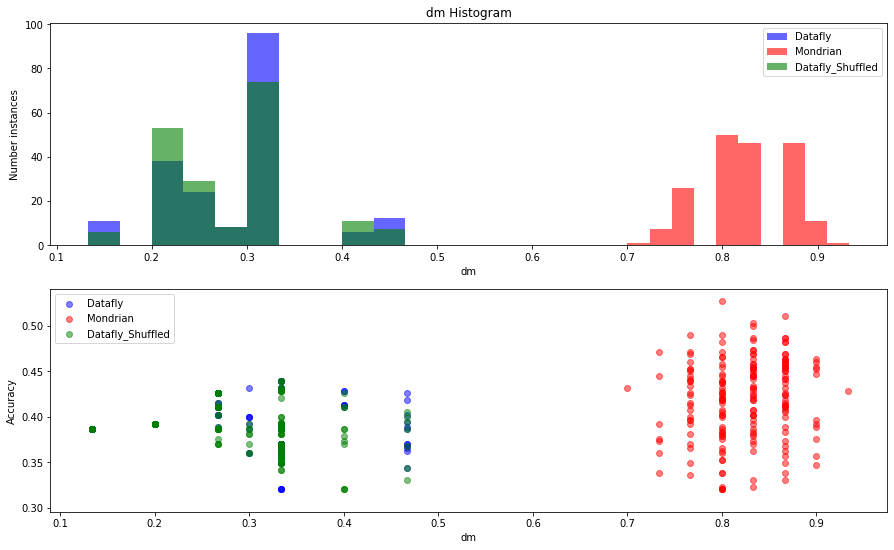

In [5]:
def plot_metric(metric):    
    fig, (ax1, ax2)= plt.subplots(2,1, figsize=(15,9))
    dataflys = results[results["algo"] == "datafly"]
    dataflys_shuff = results[results["algo"] == "datafly_shuffled"]
    mondrians = results[results["algo"] == "mondrian"]
    
    ax1.hist(dataflys[metric], label="Datafly", color="b", alpha=.6)
    ax1.hist(mondrians[metric], label="Mondrian", color="r", alpha=.6)
    ax1.hist(dataflys_shuff[metric], label="Datafly_Shuffled", color="g", alpha=.6)
    ax1.set_xlabel(metric)
    ax1.set_ylabel("Number instances")
    ax1.legend()
    ax1.set_title(f"{metric} Histogram")
    
    ax2.scatter(dataflys[metric], dataflys["lr_acc"], c="b", alpha=0.5, label="Datafly")
    ax2.scatter(mondrians[metric], mondrians["lr_acc"], c="r", alpha=0.5, label="Mondrian")
    ax2.scatter(dataflys_shuff[metric], dataflys_shuff["lr_acc"], c="g", alpha=0.5, label="Datafly_Shuffled")
    ax2.set_xlabel(metric)
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    
plot_metric("dm")

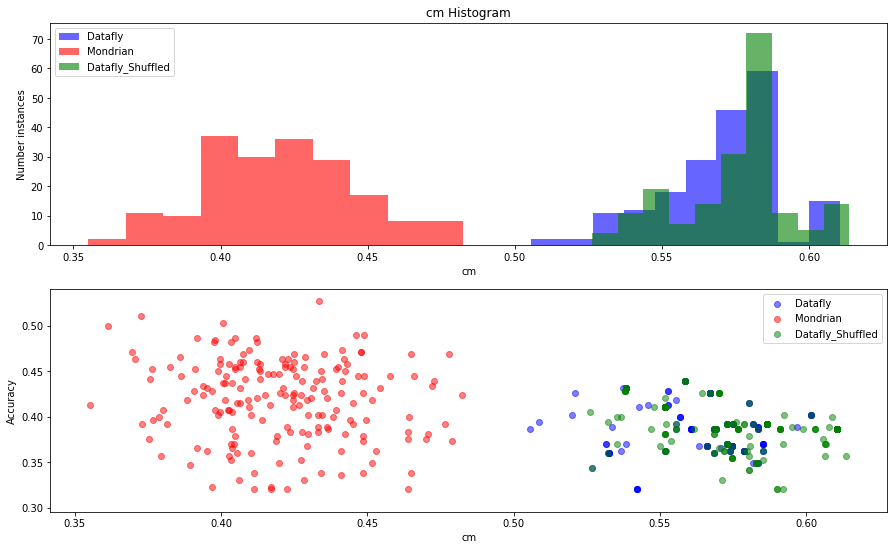

In [6]:
plot_metric("cm")

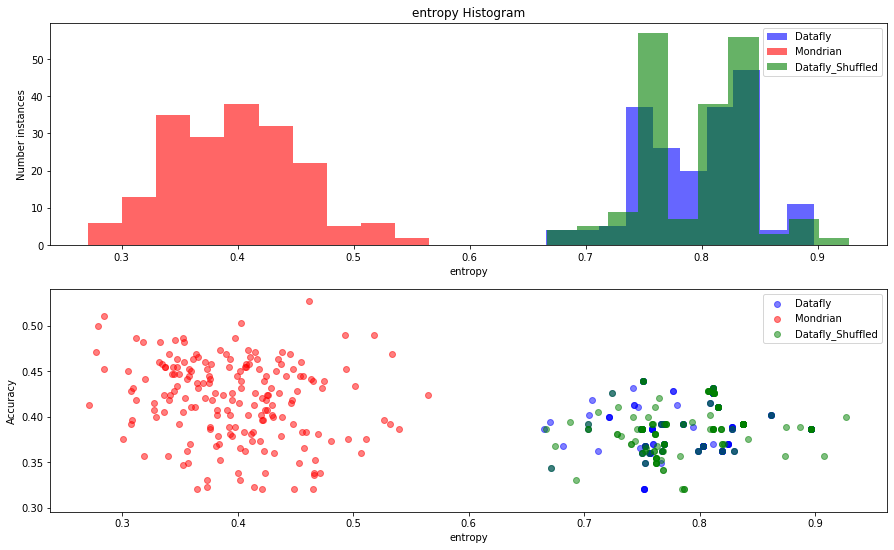

In [7]:
plot_metric("entropy")

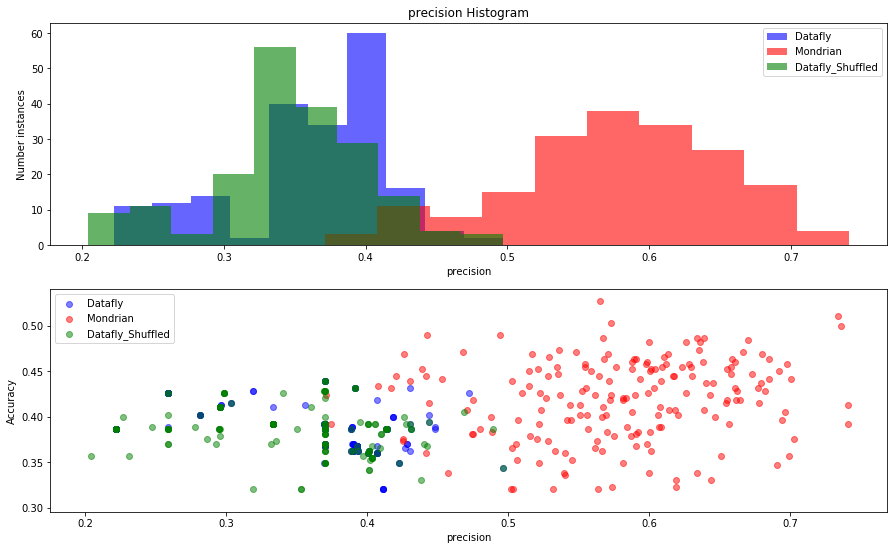

In [8]:
plot_metric("precision")

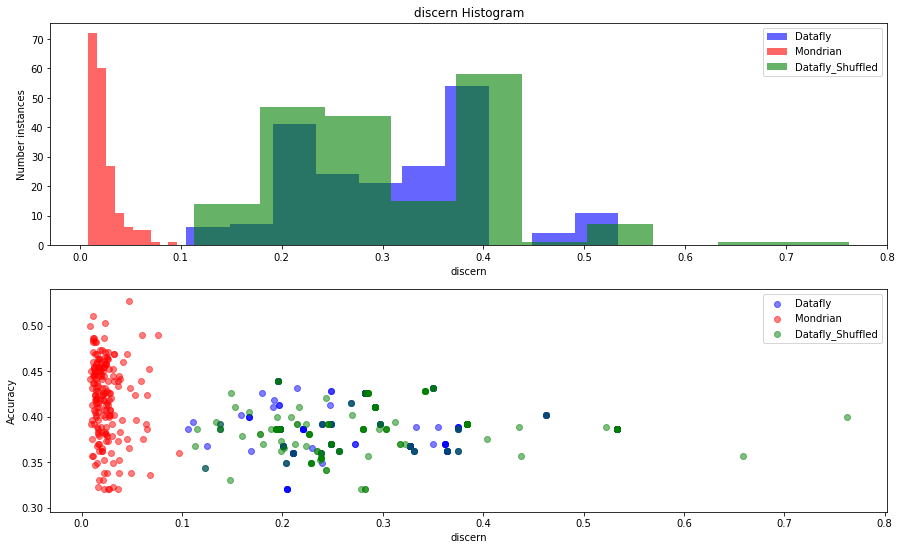

In [9]:
plot_metric("discern")

In [10]:
mondr["discern"].value_counts()

0.010591    1
0.015588    1
0.016228    1
0.013156    1
0.064590    1
           ..
0.010937    1
0.060680    1
0.023040    1
0.030813    1
0.016524    1
Name: discern, Length: 188, dtype: int64

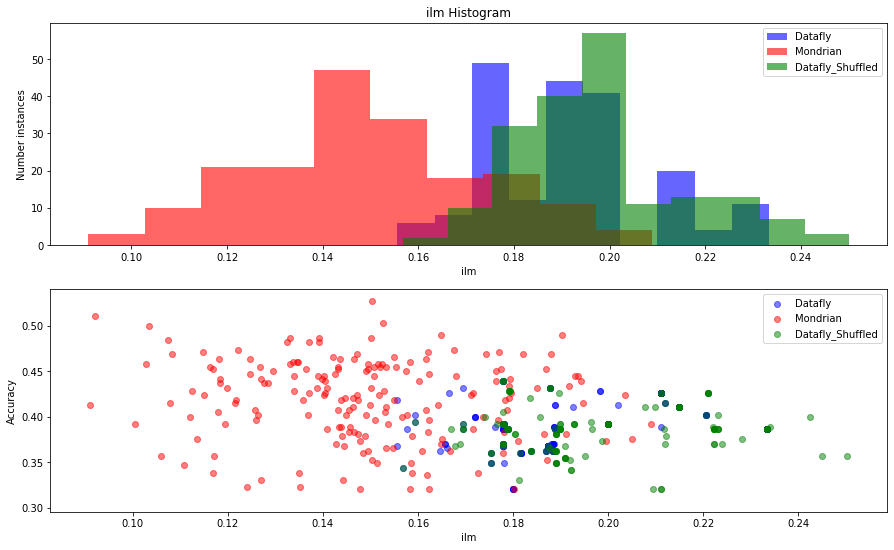

In [11]:
plot_metric("ilm")

# Plot AUROC

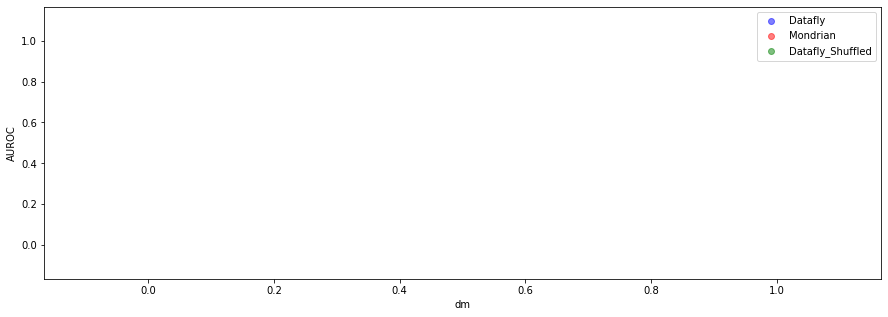

In [12]:
def plot_metric_auroc(metric):    
    fig, (ax2)= plt.subplots(1,1, figsize=(15,5))
    dataflys = results[results["algo"] == "datafly"]
    dataflys_shuff = results[results["algo"] == "datafly_shuffled"]
    mondrians = results[results["algo"] == "mondrian"]

    ax2.scatter(dataflys[metric], dataflys["auroc"], c="b", alpha=0.5, label="Datafly")
    ax2.scatter(mondrians[metric], mondrians["auroc"], c="r", alpha=0.5, label="Mondrian")
    ax2.scatter(dataflys_shuff[metric], dataflys_shuff["auroc"], c="g", alpha=0.5, label="Datafly_Shuffled")
    ax2.set_xlabel(metric)
    ax2.set_ylabel("AUROC")
    ax2.legend()
    
plot_metric_auroc("dm")

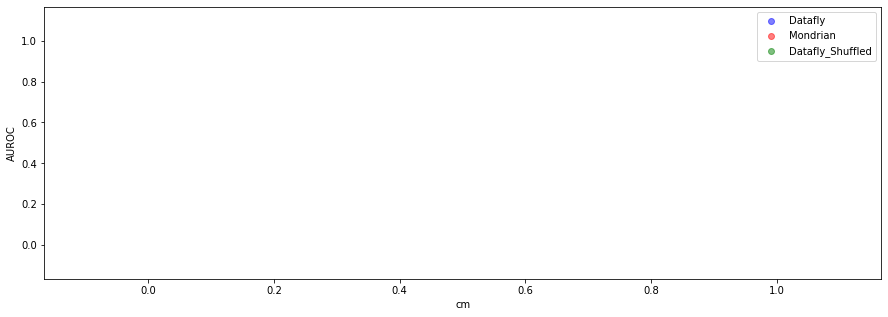

In [13]:
plot_metric_auroc("cm")

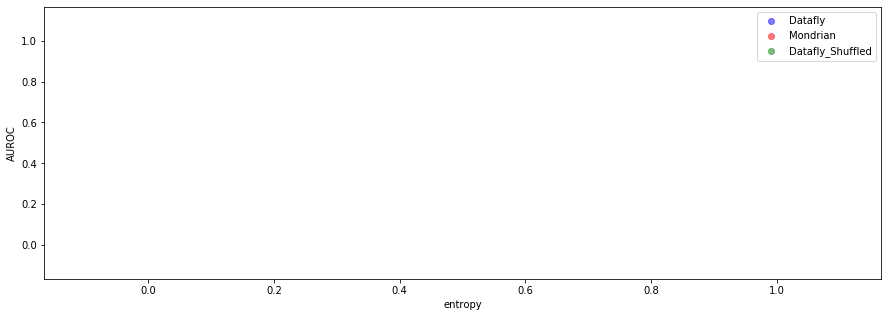

In [14]:
plot_metric_auroc("entropy")

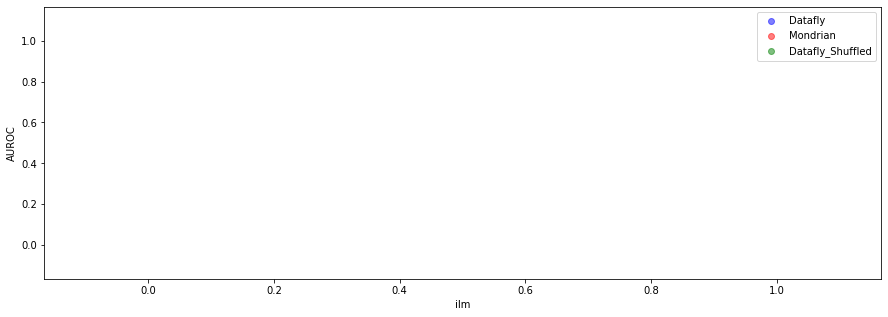

In [15]:
plot_metric_auroc("ilm")

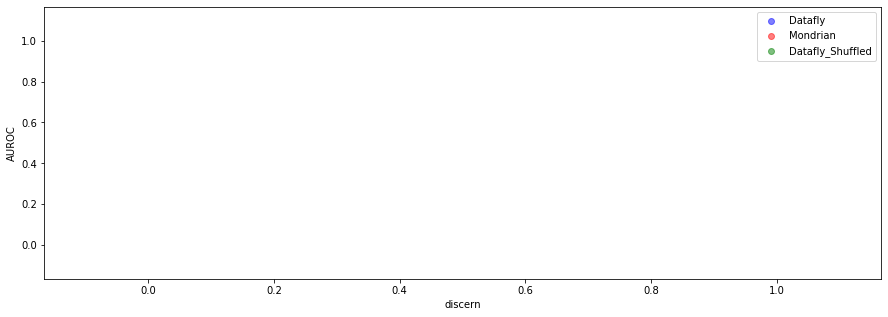

In [16]:
plot_metric_auroc("discern")

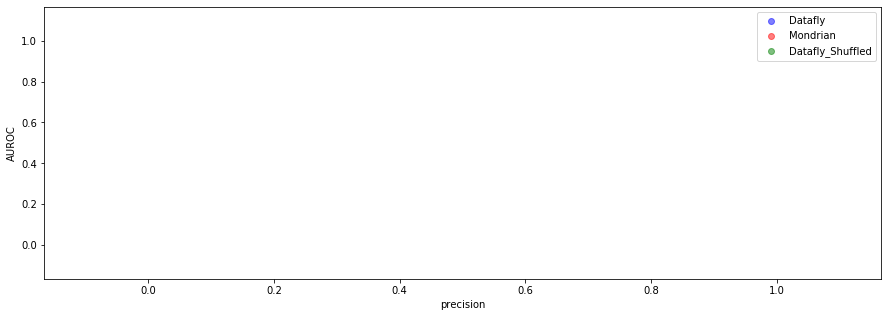

In [17]:
plot_metric_auroc("precision")

# Predicting Power

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def regress(regressor, algo_data):

    X = algo_data[regressor]
    y = algo_data["lr_acc"]

    reg = LinearRegression()
    reg.fit(X, y)

    score = reg.score(X,y)
    return reg, score

def mse(reg, attributes):
    attrs = np.array(results[attributes])
    attrs = attrs.reshape(-1,1) if len(attrs) == 1 else attrs
    y_pred = reg.predict(attrs)
    y_true = results["lr_acc"]
    mse = mean_squared_error(y_true, y_pred)
    return mse

mses = []

In [19]:
def fit_and_graph(regressor, algo_data):
    print(f"Regression on {algo_data['algo'].iloc[0]}")
    reg, score = regress([regressor], algo_data)
    coeff = reg.coef_
    intercept = reg.intercept_
    
    err = mse(reg, [regressor])
    print(f"p-value: {scipy.stats.pearsonr(algo_data[regressor],algo_data['lr_acc'])[1]}")
    print(f"R2 Score: {score}")
    print(f"MSE: {err}")
    print(f"Coeffs: {coeff}")
    print(f"Intercept: {intercept}")
    
    x = np.linspace(0,1,100)
    l = coeff*x + intercept
    
    algo_data.plot.scatter(regressor, "lr_acc", figsize=(15,6), grid=True, 
                           title=f"Linear regression of the {regressor}({algo_data['algo'].iloc[0]})")
            
    plt.plot(x,l)
    


### Entropy

Regression on datafly
p-value: 0.08568827154788121
R2 Score: 0.015225993421676298
MSE: 0.002027077464822202
Coeffs: [0.06068509]
Intercept: 0.33886048571713134

Regression on mondrian
p-value: 0.007521007383226125
R2 Score: 0.03778014573005373
MSE: 0.0016538183743278355
Coeffs: [-0.15358122]
Intercept: 0.479563439360175

Regression on datafly_shuffled
p-value: 0.0017887694240874188
R2 Score: 0.051225854325429476
MSE: 0.00282652710620706
Coeffs: [0.10501586]
Intercept: 0.3029968046421162


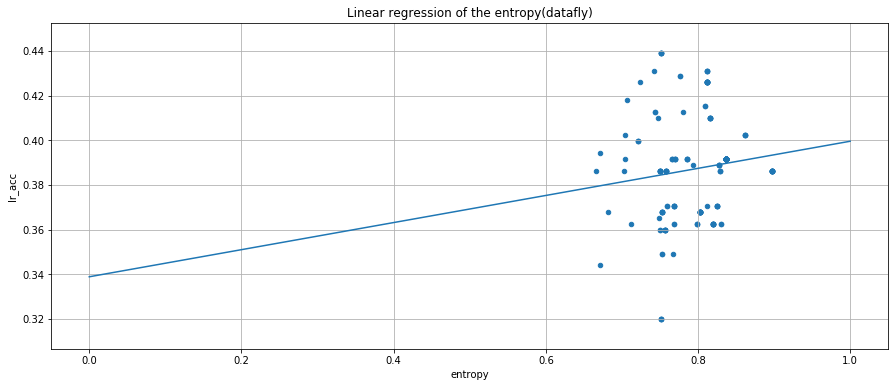

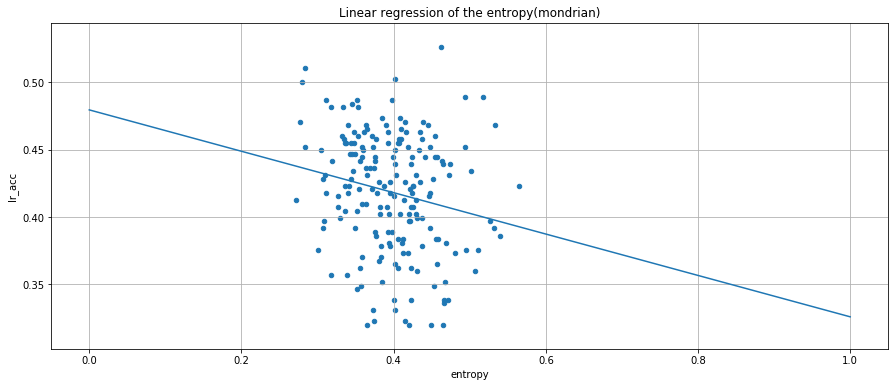

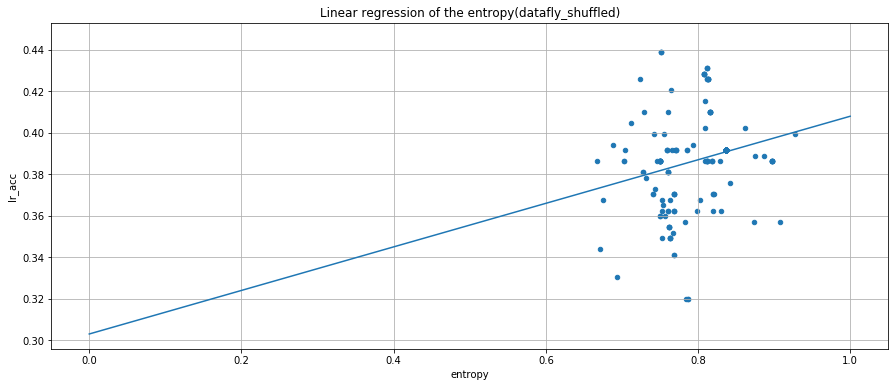

In [20]:
fit_and_graph("entropy", dataf)
print()
fit_and_graph("entropy", mondr)
print()
fit_and_graph("entropy", dataf_shuff)

### Classification Metric

Regression on datafly
p-value: 0.6358761396600329
R2 Score: 0.0011638695247564446
MSE: 0.0012036762435263739
Coeffs: [-0.03860885]
Intercept: 0.40932388520733526

Regression on mondrian
p-value: 0.10358300493414435
R2 Score: 0.014181360652537833
MSE: 0.000980002594748874
Coeffs: [-0.20766358]
Intercept: 0.5058356655486662

Regression on datafly_shuffled
p-value: 7.723322725724357e-05
R2 Score: 0.08077932249058217
MSE: 0.0011230705861300589
Coeffs: [-0.33262465]
Intercept: 0.5784435874752314


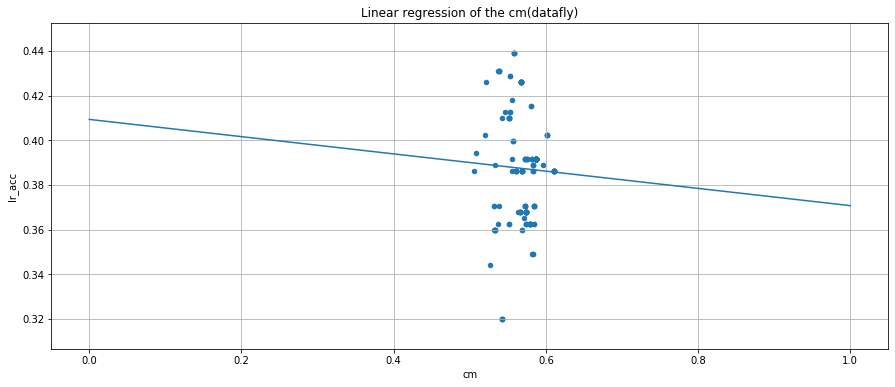

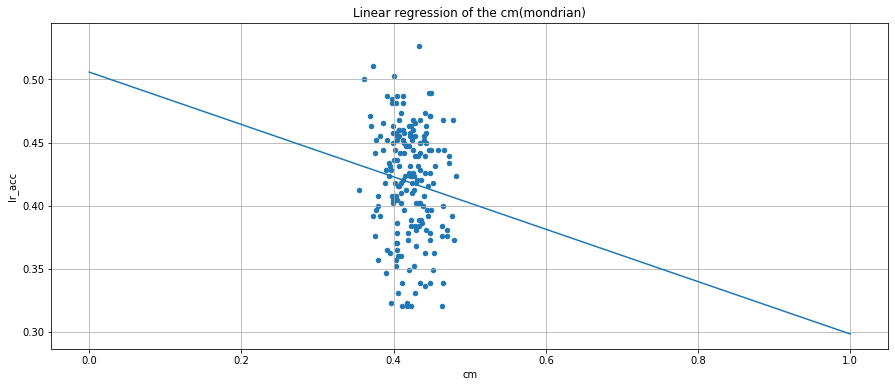

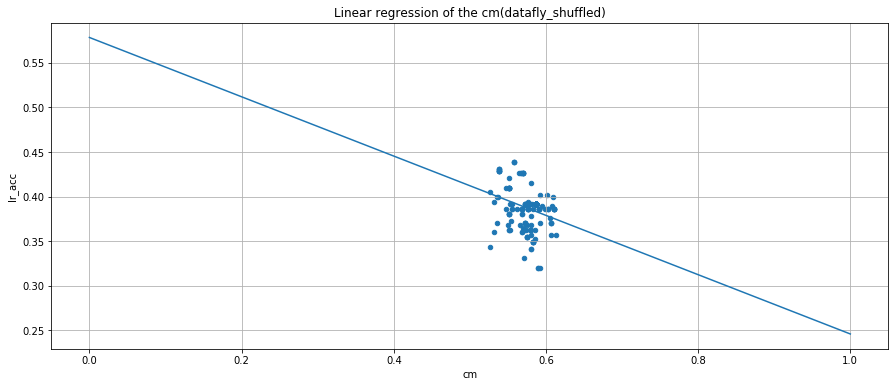

In [21]:
fit_and_graph("cm", dataf)
print()
fit_and_graph("cm", mondr)
print()
fit_and_graph("cm", dataf_shuff)

### DM

Regression on datafly
p-value: 0.01891829109375222
R2 Score: 0.028212560041131263
MSE: 0.0020831680144307385
Coeffs: [-0.04988568]
Intercept: 0.4020781365967443

Regression on mondrian
p-value: 0.06124909014702585
R2 Score: 0.018708004898009167
MSE: 0.0023736455262726073
Coeffs: [0.14017415]
Intercept: 0.30313229655334895

Regression on datafly_shuffled
p-value: 0.0007039199822237233
R2 Score: 0.060003948521799244
MSE: 0.002637343732913778
Coeffs: [-0.07233146]
Intercept: 0.4075591606196713


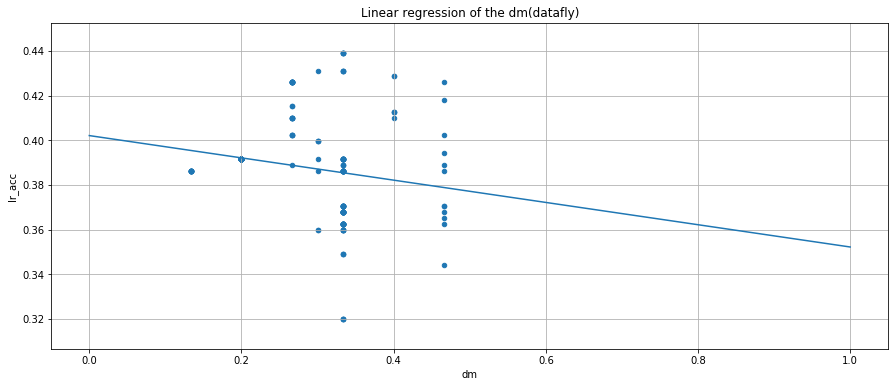

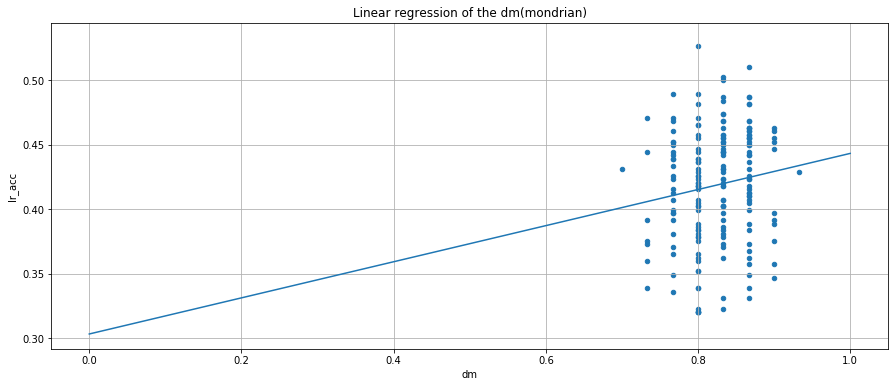

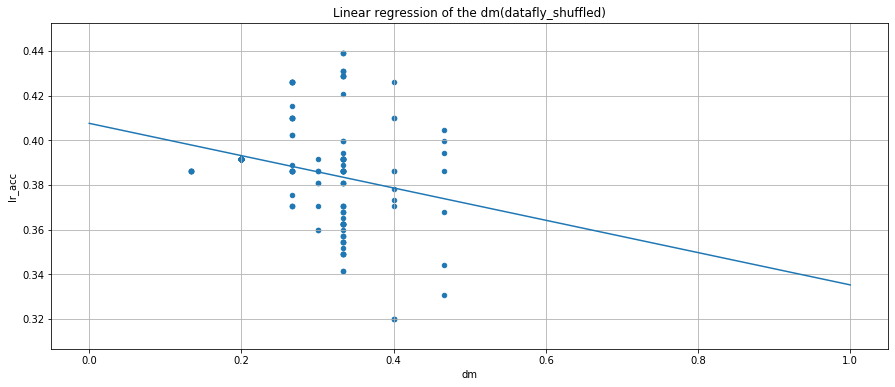

In [22]:
fit_and_graph("dm", dataf)
print()
fit_and_graph("dm", mondr)
print()
fit_and_graph("dm", dataf_shuff)

### Precision


Regression on datafly
p-value: 1.349134186198028e-10
R2 Score: 0.1928150332892853
MSE: 0.002754385763512431
Coeffs: [-0.18006005]
Intercept: 0.4514839667762344

Regression on mondrian
p-value: 0.02285958449514489
R2 Score: 0.02753348567592595
MSE: 0.0011165204464918658
Coeffs: [0.09735246]
Intercept: 0.36226380086307436

Regression on datafly_shuffled
p-value: 0.00126667437909324
R2 Score: 0.054472591022404204
MSE: 0.001960727114121119
Coeffs: [-0.09527134]
Intercept: 0.4199511396828817


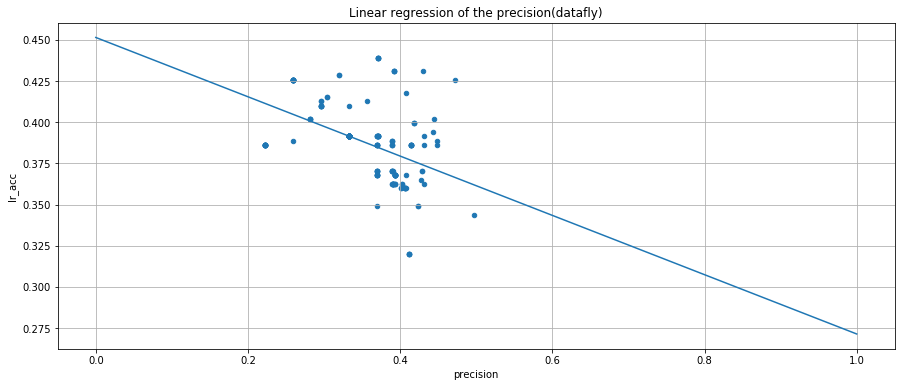

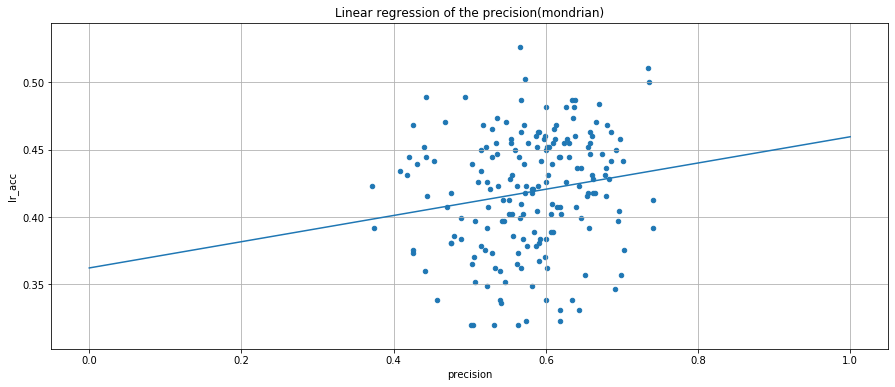

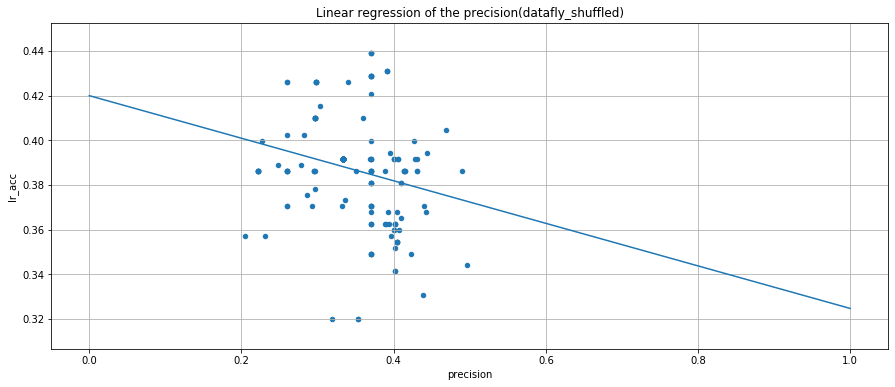

In [23]:
fit_and_graph("precision", dataf)
print()
fit_and_graph("precision", mondr)
print()
fit_and_graph("precision", dataf_shuff)


### Discernability

Regression on datafly
p-value: 0.6231446847459313
R2 Score: 0.001253611092333462
MSE: 0.0013688287705321842
Coeffs: [0.008545]
Intercept: 0.3846552762886021

Regression on mondrian
p-value: 0.06413061167623638
R2 Score: 0.018305723229764093
MSE: 0.007489574385642799
Coeffs: [-0.42490778]
Intercept: 0.4288401100226059

Regression on datafly_shuffled
p-value: 0.03817709997239038
R2 Score: 0.02289858689206015
MSE: 0.0015506685490232152
Coeffs: [0.03327009]
Intercept: 0.37671792764800327


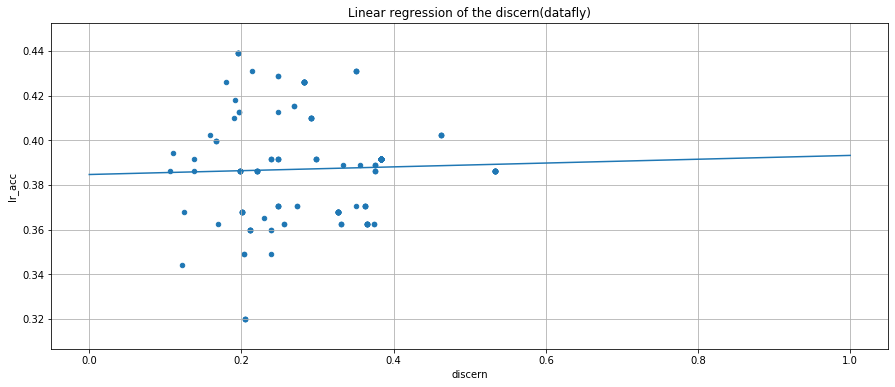

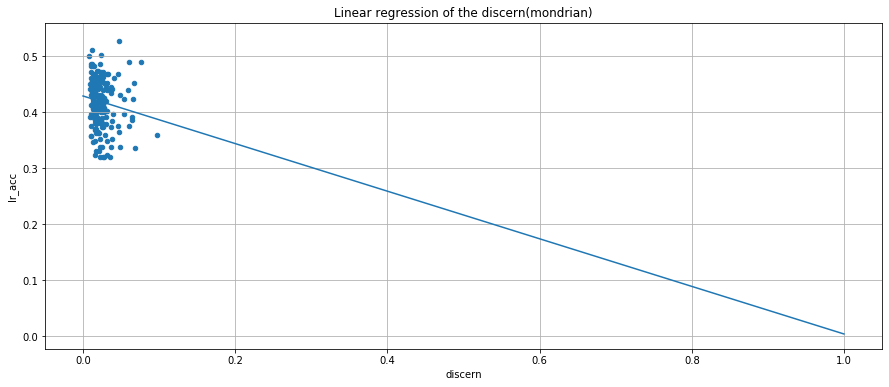

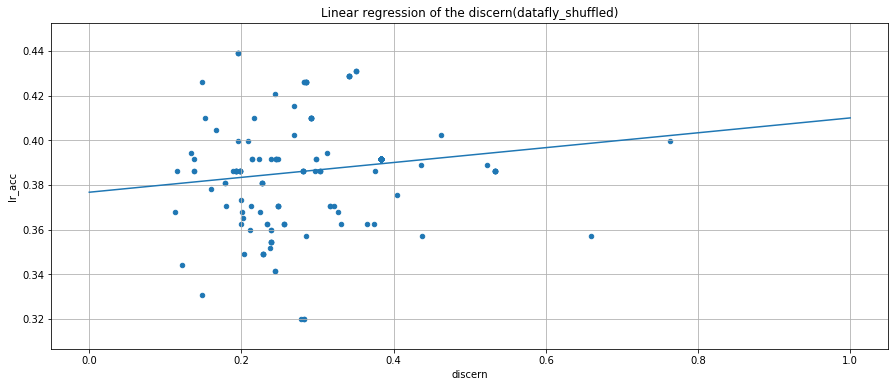

In [24]:
fit_and_graph("discern", dataf)
print()
fit_and_graph("discern", mondr)
print()
fit_and_graph("discern", dataf_shuff)

### Information Loss Metric

Regression on datafly
p-value: 1.2692426722624976e-05
R2 Score: 0.09424898498416634
MSE: 0.0018417873303262417
Coeffs: [0.41727963]
Intercept: 0.3074105867243687

Regression on mondrian
p-value: 0.1413292066051441
R2 Score: 0.011594860142452257
MSE: 0.0013535636082485382
Coeffs: [-0.20141665]
Intercept: 0.4485662237219785

Regression on datafly_shuffled
p-value: 0.2167508771843827
R2 Score: 0.00819130850300187
MSE: 0.0014595078096963647
Coeffs: [0.11726785]
Intercept: 0.36365288330522466


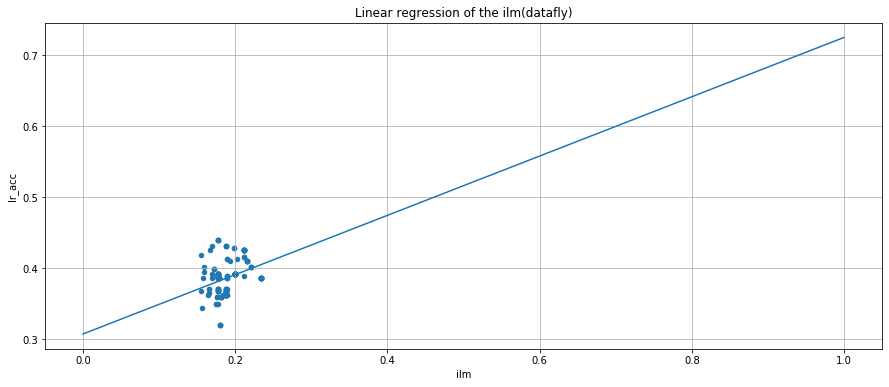

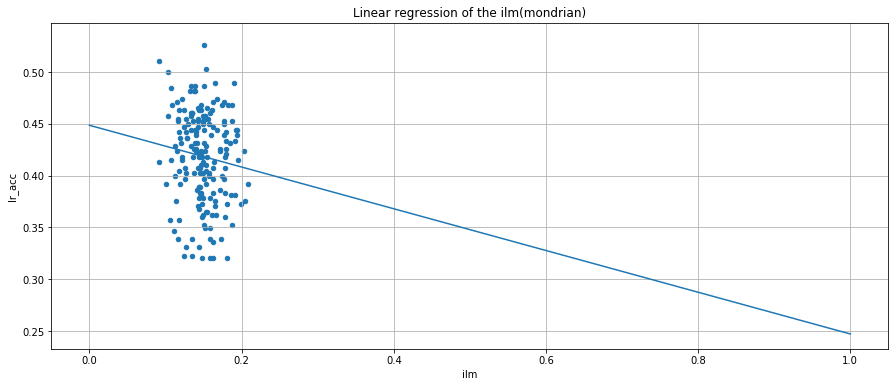

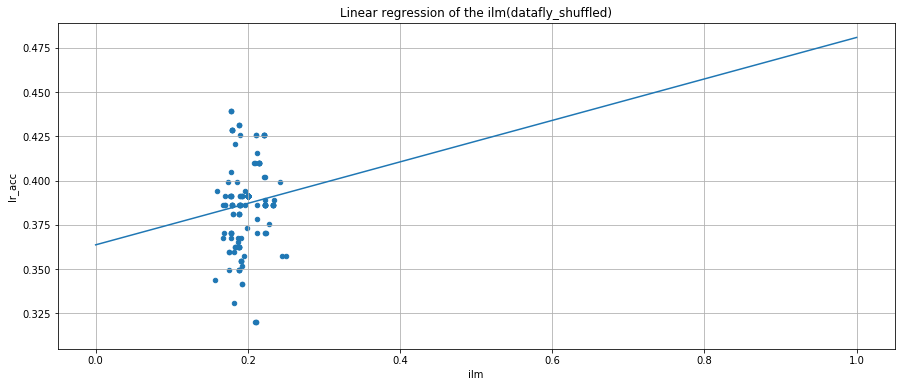

In [25]:
fit_and_graph("ilm", dataf)
print()
fit_and_graph("ilm", mondr)
print()
fit_and_graph("ilm", dataf_shuff)

### Multiple Metrics

In [26]:
metrics = ["entropy", "cm", "dm", "precision", "discern", "ilm"]

res = []
for i in range(1,6):
    
    for comb in itertools.combinations(metrics, i):
        
        ms = list(comb)
        for alg in [mondr, dataf_shuff, dataf]:
            name = alg["algo"].iloc[0] 
            reg, score = regress(ms, alg)
            err = mse(reg, ms)
            p_val = scipy.stats.pearsonr(alg[ms[0]], alg['lr_acc'])[1] if i == 1 else None
            res.append((str(ms), name, p_val, score, err))

            
df = pd.DataFrame(res, columns=["metrics", "algo", "p_value", "R2_score", "MSE_error"])
df = df.set_index(["metrics", "algo"])
df.head(20)

p_value  R2_score  MSE_error
metrics           algo                                               
['entropy']       mondrian          7.521007e-03  0.037780   0.001654
                  datafly_shuffled  1.788769e-03  0.051226   0.002827
                  datafly           8.568827e-02  0.015226   0.002027
['cm']            mondrian          1.035830e-01  0.014181   0.000980
                  datafly_shuffled  7.723323e-05  0.080779   0.001123
                  datafly           6.358761e-01  0.001164   0.001204
['dm']            mondrian          6.124909e-02  0.018708   0.002374
                  datafly_shuffled  7.039200e-04  0.060004   0.002637
                  datafly           1.891829e-02  0.028213   0.002083
['precision']     mondrian          2.285958e-02  0.027533   0.001117
                  datafly_shuffled  1.266674e-03  0.054473   0.001961
                  datafly           1.349134e-10  0.192815   0.002754
['discern']       mondrian          6.413061e-02  0.018306   0.007490
                  datafly_shuffled  3.817710e-02  0.022899   0.001551
                  datafly           6.231447e-01  0.001254   0.001369
['ilm']           mondrian          1.413292e-01  0.011595   0.001354
                  datafly_shuffled  2.167509e-01  0.008191   0.001460
                  datafly           1.269243e-05  0.094249   0.001842
['entropy', 'cm'] mondrian                   NaN  0.040243   0.001616
                  datafly_shuffled           NaN  0.366241   0.001291